In [5]:
# %%  Full EDA for train_translated_full.csv 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

#  Path 
path = "/Users/shamsvibaloonikhan/Desktop/train_translated_full.csv"

In [7]:
#  Load Data 
df = pd.read_csv(path)
print("✅ Data loaded successfully!")
print(f"Total Rows: {len(df):,}")
print(f"Total Columns: {len(df.columns)}\n")

✅ Data loaded successfully!
Total Rows: 130,319
Total Columns: 6



In [9]:

#  Overview 
print("📊 Columns:\n", list(df.columns))
print("\n📋 Data Types:\n", df.dtypes)
print("\n🔍 Preview:")
display(df.head(3))


📊 Columns:
 ['title', 'context', 'question', 'answer_text', 'context_hi', 'question_hi']

📋 Data Types:
 title          object
context        object
question       object
answer_text    object
context_hi     object
question_hi    object
dtype: object

🔍 Preview:


,title,context,question,answer_text,context_hi,question_hi
0,Beyoncé,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,When did Beyonce start becoming popular?,in the late 1990s,बेयॉन्से गिज़ेल नॉल्स-कार्टर (/biːˈjɒnseɪ/ bee...,बेयोंस कब से लोकप्रिय हो रही है?
1,Beyoncé,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,What areas did Beyonce compete in when she was...,singing and dancing,बेयॉन्से गिज़ेल नॉल्स-कार्टर (/biːˈjɒnseɪ/ bee...,जब वह बड़ी थी तो बेयोंस किस क्षेत्र में प्रतिस...
2,Beyoncé,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,When did Beyonce leave Destiny's Child and bec...,2003,बेयॉन्से गिज़ेल नॉल्स-कार्टर (/biːˈjɒnseɪ/ bee...,बेयोंस ने डेस्टिनी चाइल्ड को कब छोड़ दिया और ए...


In [11]:
#  Missing Values 
print("\n🚫 Missing Values:")
missing = df.isnull().sum()
display(missing[missing > 0])


🚫 Missing Values:


answer_text    43501
dtype: int64

In [13]:
#  Duplicate Check 
dupes = df.duplicated().sum()
print(f"\n📎 Duplicate rows: {dupes}")

#  Basic Info 
print("\n📈 Dataset Info:")
df.info()



📎 Duplicate rows: 26

📈 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130319 entries, 0 to 130318
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   title        130319 non-null  object
 1   context      130319 non-null  object
 2   question     130319 non-null  object
 3   answer_text  86818 non-null   object
 4   context_hi   130319 non-null  object
 5   question_hi  130319 non-null  object
dtypes: object(6)
memory usage: 6.0+ MB


In [15]:
#  Summary Statistics (numeric + text length) 
print("\n📊 Summary Statistics (numeric):")
display(df.describe())



📊 Summary Statistics (numeric):


,title,context,question,answer_text,context_hi,question_hi
count,130319,130319,130319,86818,130319,130319
unique,442,19029,130217,64761,19029,129931
top,Queen_Victoria,"Victoria married her first cousin, Prince Albe...",In what year did World War II start?,three,"विक्टोरिया ने 1840 में अपने पहले चचेरे भाई, सै...",क्या हुआ?
freq,883,30,3,231,30,4


In [17]:
#  Text Length Analysis 
text_cols = [c for c in df.columns if df[c].dtype == 'object']
print(f"\n📝 Text Columns ({len(text_cols)}): {text_cols}")

for col in text_cols:
    df[f"{col}_len"] = df[col].astype(str).apply(len)

# Average length of text fields
avg_lengths = df[[c for c in df.columns if c.endswith('_len')]].mean().sort_values(ascending=False)
print("\n📏 Average text length by column:")
display(avg_lengths)



📝 Text Columns (6): ['title', 'context', 'question', 'answer_text', 'context_hi', 'question_hi']

📏 Average text length by column:


context_len        754.566287
context_hi_len     682.651425
question_len        58.507739
question_hi_len     55.619188
answer_text_len     14.425080
title_len           14.337372
dtype: float64

/Users/shamsvibaloonikhan/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


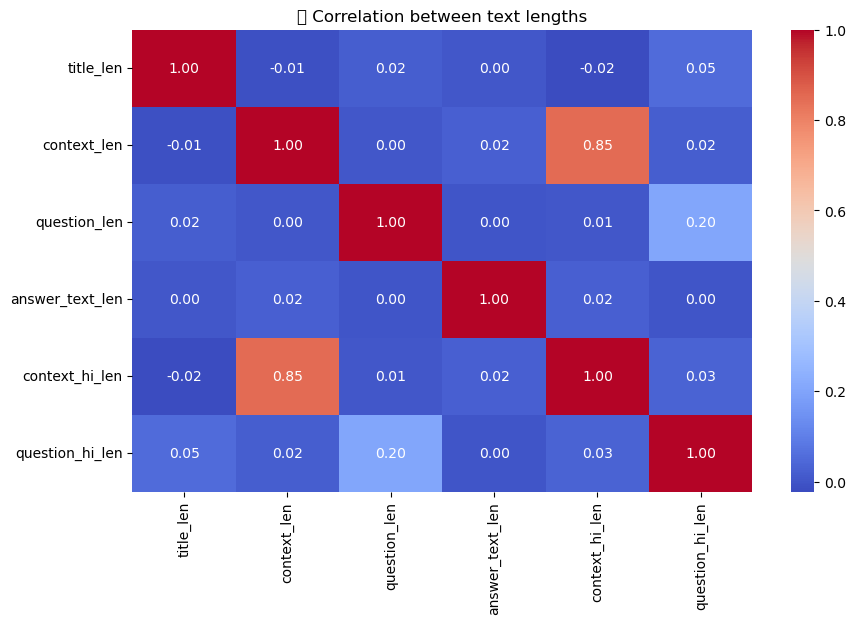

In [19]:
#  Correlation (lengths) 
corr = df[[c for c in df.columns if c.endswith('_len')]].corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("🔗 Correlation between text lengths")
plt.show()


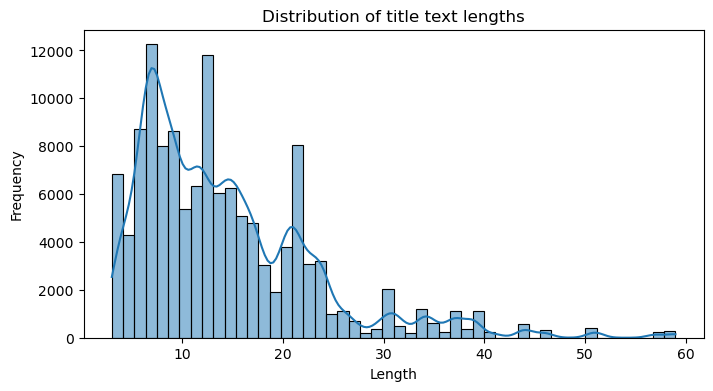

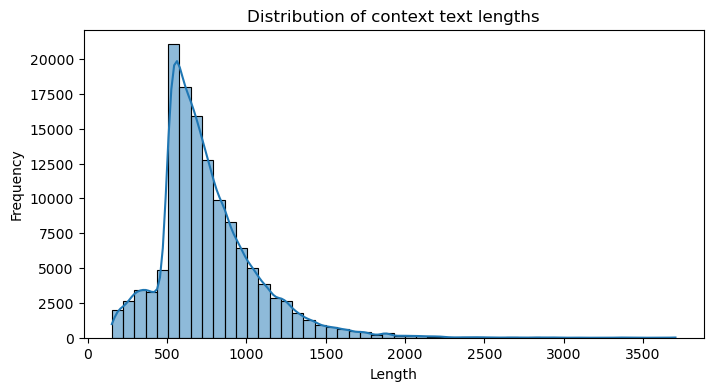

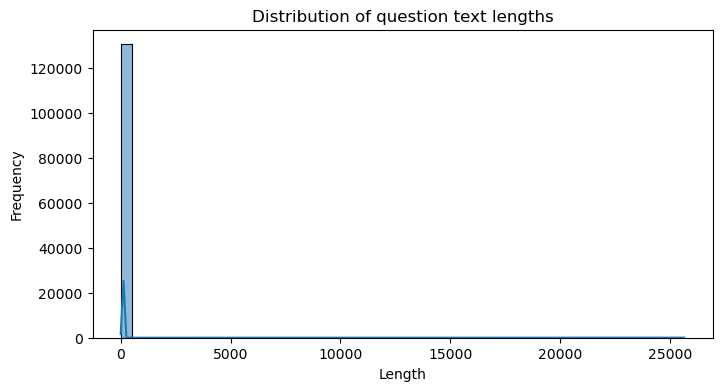

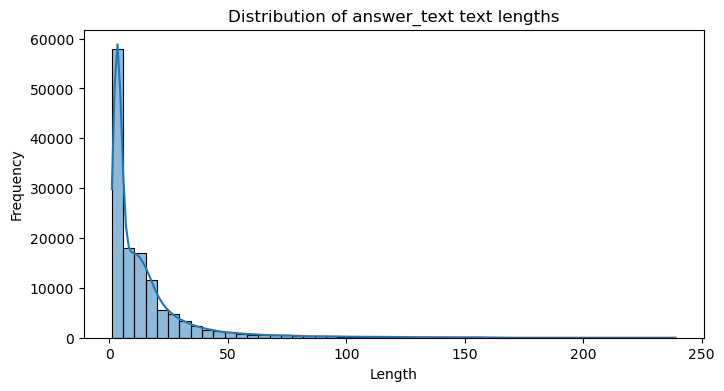

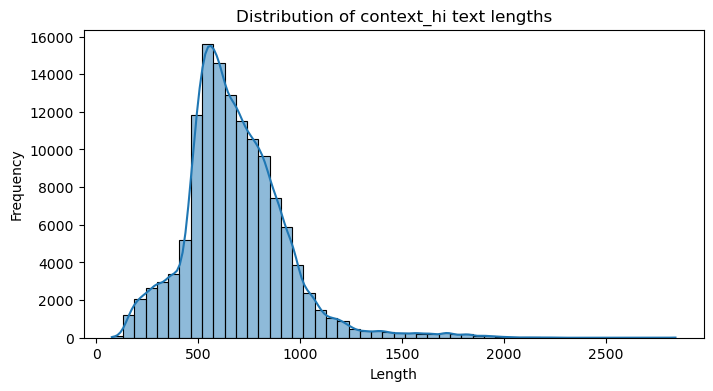

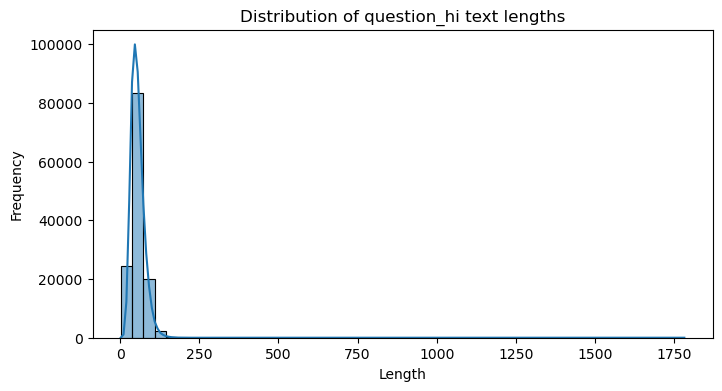

In [21]:
#  Distribution plots for text length 
for col in text_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df[f"{col}_len"], bins=50, kde=True)
    plt.title(f"Distribution of {col} text lengths")
    plt.xlabel("Length")
    plt.ylabel("Frequency")
    plt.show()

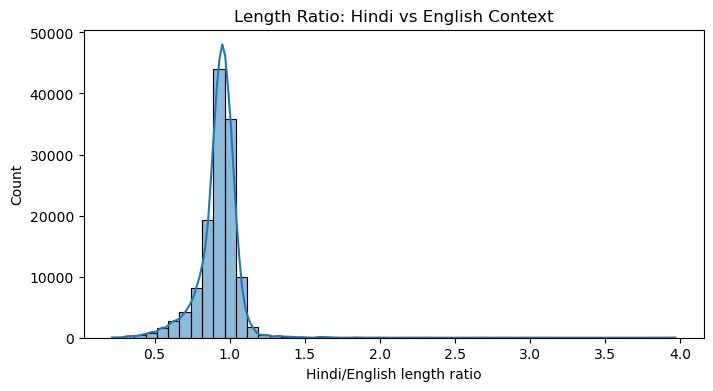

In [23]:
#  Language consistency check (if translation columns exist) 
if "context_hi" in df.columns and "context" in df.columns:
    df["context_same_len_ratio"] = df["context_hi_len"] / (df["context_len"] + 1)
    plt.figure(figsize=(8,4))
    sns.histplot(df["context_same_len_ratio"], bins=50, kde=True)
    plt.title("Length Ratio: Hindi vs English Context")
    plt.xlabel("Hindi/English length ratio")
    plt.show()


/Users/shamsvibaloonikhan/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127775 (\N{GLOWING STAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


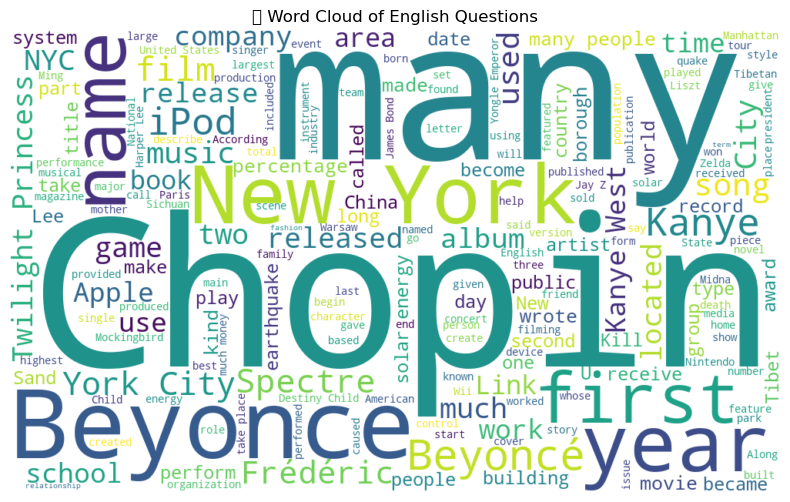

In [35]:
#  Word Cloud (Optional, if you want visualization of frequent words) 
try:
    from wordcloud import WordCloud
    text = " ".join(df["question"].dropna().astype(str).values[:5000])
    plt.figure(figsize=(10,6))
    wc = WordCloud(width=1000, height=600, background_color='white').generate(text)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title("🌟 Word Cloud of English Questions")
    plt.show()
except:
    print("⚠️ WordCloud not installed. Run `pip install wordcloud` to enable this.")
